In [1]:
#Importing the dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Loading the Mall customer dataset
dataset=pd.read_csv("/content/Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Checking dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Checking missing values
print(dataset.isnull().values.any())

False


In [6]:
#Choosing columns to cluster with
Y=dataset.iloc[:,[3,4]].values
print(Y)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [7]:
#Finding number of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=30)
  kmeans.fit(Y)
  wcss.append(kmeans.inertia_)

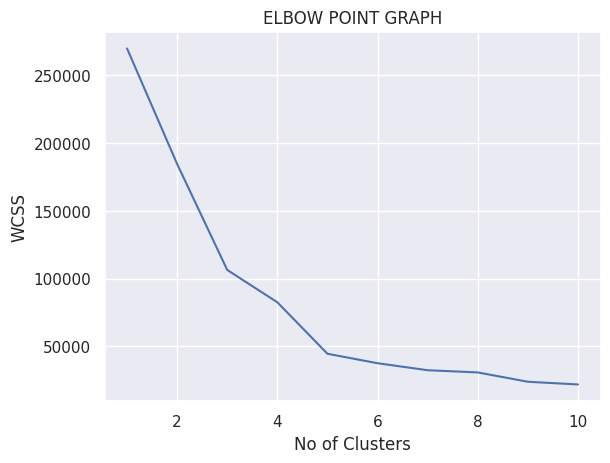

In [8]:
#Plotting the Elbow graph to find clusters number
sns.set()
plt.plot(range(1,11),wcss)
plt.title("ELBOW POINT GRAPH")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

Adding more clusters after k=5 gives diminishing returns hence we choose
k=5

In [9]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=30)
X=kmeans.fit_predict(Y)

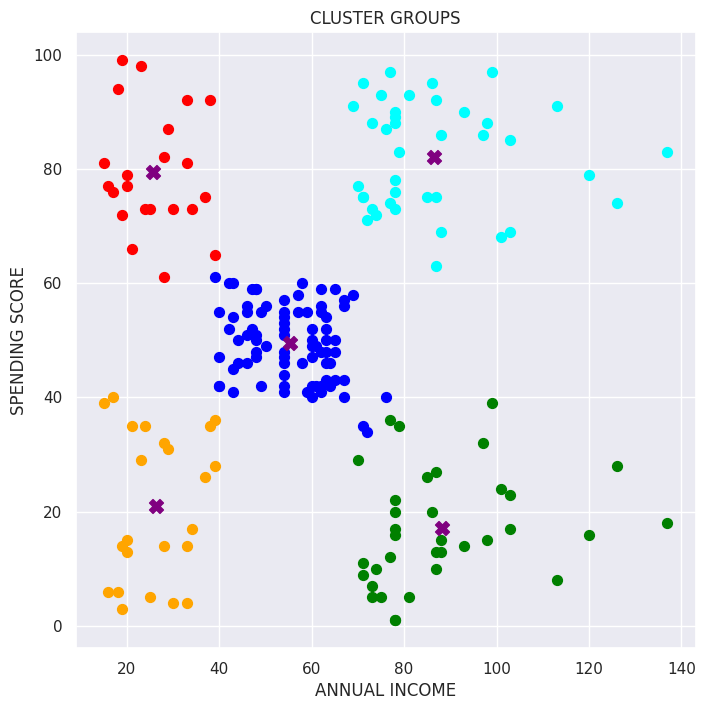

In [10]:
#Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(Y[X==0,0],Y[X==0,1],s=50,c="green",label="CLUSTER1")
plt.scatter(Y[X==1,0],Y[X==1,1],s=50,c="red",label="CLUSTER2")
plt.scatter(Y[X==2,0],Y[X==2,1],s=50,c="blue",label="CLUSTER3")
plt.scatter(Y[X==3,0],Y[X==3,1],s=50,c="cyan",label="CLUSTER4")
plt.scatter(Y[X==4,0],Y[X==4,1],s=50,c="orange",label="CLUSTER5")
#Plotting the centoids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="purple",marker="X",label="CENTROIDS")
plt.title("CLUSTER GROUPS")
plt.xlabel("ANNUAL INCOME")
plt.ylabel("SPENDING SCORE")
plt.grid(True)
plt.show()

In [11]:
# Add cluster labels back to the dataset
dataset['Cluster'] = X

# See average characteristics of each cluster
print(dataset.groupby('Cluster').mean(numeric_only=True))


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        164.371429  41.114286           88.200000               17.114286
1         23.090909  25.272727           25.727273               79.363636
2         86.320988  42.716049           55.296296               49.518519
3        162.000000  32.692308           86.538462               82.128205
4         23.000000  45.217391           26.304348               20.913043


Interpretation of results(INSIGHTS ABOUT THE DATA)
EXAMPLE
Cluster 0
Age approx 41
Income approx 88k
Spending Score approx 17
Interpretation:
Segment Description-Wealthy, low spending
Possible reasons-Possibly financially cautious or not interested in available products
Suggested Strategy-Loyalty rewards, lifestyle matching